In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Load data- earthquake

In [12]:
df1= pd.read_csv('/Users/zo/Desktop/SDS_Mobility/Flowminder/displacements_counts/Haiti_Earthquake/t01.csv')
df2= pd.read_csv('/Users/zo/Desktop/SDS_Mobility/Flowminder/displacements_counts/Haiti_Earthquake/t02.csv')
df3= pd.read_csv('/Users/zo/Desktop/SDS_Mobility/Flowminder/displacements_counts/Haiti_Earthquake/t03.csv')

In [13]:
#check and drop missing values
#replace entries for which building damage is missing with np.nan 

def clean_missing(df):
    df['t0_prop_damaged_buildings_300m']= df['t0_prop_damaged_buildings_300m'].apply(lambda x: x if x != -999.0 else 'unknown')
    
    if 't1_prop_damaged_buildings_300m' in df.columns:
        df['t1_prop_damaged_buildings_300m']= df['t1_prop_damaged_buildings_300m'].apply(lambda x: x if x != -999.0 else 'unknown')

    elif 't2_prop_damaged_buildings_300m' in df.columns:
        df['t2_prop_damaged_buildings_300m']= df['t2_prop_damaged_buildings_300m'].apply(lambda x: x if x != -999.0 else 'unknown')
    
    elif 't3_prop_damaged_buildings_300m' in df.columns:
        df['t3_prop_damaged_buildings_300m']= df['t3_prop_damaged_buildings_300m'].apply(lambda x: x if x != -999.0 else 'unknown')

    #drop nan values
    df.dropna(inplace=True)    
    #drop duplicates
    df.drop_duplicates(inplace=True)
    df.drop_duplicates(subset=['t0_rog', 't0_entropy_step', 't0_known_locs','t0_prop_damaged_buildings_300m', 't0_EQ_MMI',
       't0_dist2_DTMsites_km_2010', 't0_popdensity3km_2010',
       't0_sumDTM_IDPpop_300m_2010'],inplace=True)
    
    df.reset_index(inplace=True)
    df.drop(columns='index', inplace=True)
    return df

In [14]:
df1, df2, df3= clean_missing(df1), clean_missing(df2), clean_missing(df3)

In [15]:
df_all = pd.merge(df1, df2, on=['t0_rog', 't0_entropy_step', 't0_known_locs','t0_prop_damaged_buildings_300m', 't0_EQ_MMI',
       't0_dist2_DTMsites_km_2010', 't0_popdensity3km_2010',
       't0_sumDTM_IDPpop_300m_2010'], how='inner')

In [16]:
df_all= pd.merge(df_all, df3, on=['t0_rog', 't0_entropy_step', 't0_known_locs','t0_prop_damaged_buildings_300m', 't0_EQ_MMI',
       't0_dist2_DTMsites_km_2010', 't0_popdensity3km_2010',
       't0_sumDTM_IDPpop_300m_2010'], how='inner')

In [17]:
df_all.rename(columns={'dist_to_hl_x': 't1_dist_to_hl',
                  'dist_to_hl_y': 't2_dist_to_hl',
                  'dist_to_hl': 't3_dist_to_hl'}, inplace=True)

In [18]:
cols_t0= df_all.columns[df_all.columns.str.startswith('t0')].tolist()
cols_t1= df_all.columns[df_all.columns.str.startswith('t1')].tolist()
cols_t2= df_all.columns[df_all.columns.str.startswith('t2')].tolist()
cols_t3= df_all.columns[df_all.columns.str.startswith('t3')].tolist()
cols= cols_t0 + cols_t1 + cols_t2 + cols_t3
df_all = df_all[cols]

In [19]:
for num, col in enumerate(df_all.columns):
    print(num, col)

0 t0_rog
1 t0_entropy_step
2 t0_known_locs
3 t0_prop_damaged_buildings_300m
4 t0_EQ_MMI
5 t0_dist2_DTMsites_km_2010
6 t0_popdensity3km_2010
7 t0_sumDTM_IDPpop_300m_2010
8 t1_known_locs
9 t1_prop_damaged_buildings_300m
10 t1_EQ_MMI
11 t1_dist2_DTMsites_km_2010
12 t1_popdensity3km_2010
13 t1_sumDTM_IDPpop_300m_2010
14 t1_dist_to_hl
15 t2_known_locs
16 t2_prop_damaged_buildings_300m
17 t2_EQ_MMI
18 t2_dist2_DTMsites_km_2010
19 t2_popdensity3km_2010
20 t2_sumDTM_IDPpop_300m_2010
21 t2_dist_to_hl
22 t3_known_locs
23 t3_prop_damaged_buildings_300m
24 t3_EQ_MMI
25 t3_dist2_DTMsites_km_2010
26 t3_popdensity3km_2010
27 t3_sumDTM_IDPpop_300m_2010
28 t3_dist_to_hl


In [20]:
df_earthquake = df_all

### Load data- Hurricane

### Load data

In [22]:
df1= pd.read_csv('/Users/zo/Desktop/SDS_Mobility/Flowminder/displacements_counts/Haiti_HuricaneMatthew/t01.csv')
df2= pd.read_csv('/Users/zo/Desktop/SDS_Mobility/Flowminder/displacements_counts/Haiti_HuricaneMatthew/t02.csv')
df3= pd.read_csv('/Users/zo/Desktop/SDS_Mobility/Flowminder/displacements_counts/Haiti_HuricaneMatthew/t03.csv')

In [23]:
#check and drop missing values
#replace entries for which building damage is missing with np.nan 

def clean_missing(df):
    
    df.drop(columns=['t0_mean_HTI_mat_prop_damage_3km',
                     't0_mean_dist2_DTMsites_km_Dec16Apr17',
                     't0_mean_sumDTM_IDPpop_3km_May17Sep17',
                     't0_mean_sumDTM_IDPpop_3km_Dec16Apr17'
                    ], inplace=True)
    
    df['t0_contact_locs'].apply(lambda x: x if x!= -999.00 else 0.0)
    
    
    if 't1_mean_HTI_mat_prop_damage_3km' in df.columns:
        df.drop(columns=['t1_mean_HTI_mat_prop_damage_3km',
                     't1_mean_dist2_DTMsites_km_Dec16Apr17',
                     't1_mean_sumDTM_IDPpop_3km_May17Sep17',
                     't1_mean_sumDTM_IDPpop_3km_Dec16Apr17',
                    't1_sum_idps_3km'
                    ], inplace=True)
        
        df['t1_contact_locs'].apply(lambda x: x if x!= -999.00 else 0.0)

    elif 't2_mean_HTI_mat_prop_damage_3km' in df.columns:
        df.drop(columns=['t2_mean_HTI_mat_prop_damage_3km',
                     't2_mean_dist2_DTMsites_km_Dec16Apr17',
                     't2_mean_sumDTM_IDPpop_3km_May17Sep17',
                     't2_mean_sumDTM_IDPpop_3km_Dec16Apr17',
                    't2_sum_idps_3km'], inplace=True)
        
        df['t2_contact_locs'].apply(lambda x: x if x!= -999.00 else 0.0)
        
    elif 't3_mean_HTI_mat_prop_damage_3km' in df.columns:
        df.drop(columns=['t3_mean_HTI_mat_prop_damage_3km',
                     't3_mean_dist2_DTMsites_km_Dec16Apr17',
                     't3_mean_sumDTM_IDPpop_3km_May17Sep17',
                     't3_mean_sumDTM_IDPpop_3km_Dec16Apr17',
                     't3_sum_idps_3km'
                    ], inplace=True)
        
        df['t3_contact_locs'].apply(lambda x: x if x!= -999.00 else 0.0)    
    #drop nan values
    df.dropna(inplace=True)    
    #drop duplicates
    df.drop_duplicates(inplace=True)
    #keep only one copy of IDPs with exact same combination of home location variables (to enable merging)
    df.drop_duplicates(subset=['t0_median_calls', 't0_rog', 't0_entropy_step', 't0_contact_locs',
       't0_known_locs', 't0_mean_HTI_mat_gust_footprint_3km',
       't0_mean_HTI_mat_prop_damage_3km_extrapdist',
       't0_mean_HTI_mat_rain3to5oct_mm_3km', 't0_mean_dist2_DTMsites_km_Nov16',
       't0_mean_dist2_mainroads_km', 't0_mean_dist2_urbancentres_km',
       't0_mean_popdensity3km_2015_UTM18N', 't0_mean_sumDTM_IDPpop_3km_Nov16'], inplace=True)
    
    df.reset_index(inplace=True)
    df.drop(columns='index', inplace=True)
    return df

In [24]:
df1, df2, df3= clean_missing(df1), clean_missing(df2), clean_missing(df3)

In [25]:
df_all = pd.merge(df1, df2, on=['t0_median_calls', 't0_rog', 't0_entropy_step', 't0_contact_locs',
       't0_known_locs', 't0_mean_HTI_mat_gust_footprint_3km',
       't0_mean_HTI_mat_prop_damage_3km_extrapdist',
       't0_mean_HTI_mat_rain3to5oct_mm_3km', 't0_mean_dist2_DTMsites_km_Nov16',
       't0_mean_dist2_mainroads_km', 't0_mean_dist2_urbancentres_km',
       't0_mean_popdensity3km_2015_UTM18N', 't0_mean_sumDTM_IDPpop_3km_Nov16'], how='inner')

In [26]:
df_all = pd.merge(df_all, df3, on=['t0_median_calls', 't0_rog', 't0_entropy_step', 't0_contact_locs',
       't0_known_locs', 't0_mean_HTI_mat_gust_footprint_3km',
       't0_mean_HTI_mat_prop_damage_3km_extrapdist',
       't0_mean_HTI_mat_rain3to5oct_mm_3km', 't0_mean_dist2_DTMsites_km_Nov16',
       't0_mean_dist2_mainroads_km', 't0_mean_dist2_urbancentres_km',
       't0_mean_popdensity3km_2015_UTM18N', 't0_mean_sumDTM_IDPpop_3km_Nov16'], how='inner')

In [27]:
df_all.drop(columns='t0_median_calls', inplace=True)

In [28]:
df_all.rename(columns={'dist_to_hl_x': 't1_dist_to_hl',
                  'dist_to_hl_y': 't2_dist_to_hl',
                  'dist_to_hl': 't3_dist_to_hl',
                  't0_mean_popdensity3km_2015_UTM18N':'t0_popdensity3km_2015',
                  't1_mean_popdensity3km_2015_UTM18N':'t1_popdensity3km_2015',
                  't2_mean_popdensity3km_2015_UTM18N':'t2_popdensity3km_2015',
                  't3_mean_popdensity3km_2015_UTM18N':'t3_popdensity3km_2015',
                  't0_mean_HTI_mat_gust_footprint_3km': 't0_wind_instensity',
                  't1_mean_HTI_mat_gust_footprint_3km': 't1_wind_instensity',
                  't2_mean_HTI_mat_gust_footprint_3km': 't2_wind_instensity',
                  't3_mean_HTI_mat_gust_footprint_3km': 't3_wind_instensity',
                  't0_mean_HTI_mat_rain3to5oct_mm_3km': 't0_rain_intensity',
                  't1_mean_HTI_mat_rain3to5oct_mm_3km': 't1_rain_intensity',
                  't2_mean_HTI_mat_rain3to5oct_mm_3km': 't2_rain_intensity',
                  't3_mean_HTI_mat_rain3to5oct_mm_3km': 't3_rain_intensity',
                  't0_mean_HTI_mat_prop_damage_3km_extrapdist': 't0_prop_damaged_buildings',
                  't1_mean_HTI_mat_prop_damage_3km_extrapdist': 't1_prop_damaged_buildings',
                  't2_mean_HTI_mat_prop_damage_3km_extrapdist': 't2_prop_damaged_buildings',
                  't3_mean_HTI_mat_prop_damage_3km_extrapdist': 't3_prop_damaged_buildings',
                  't0_mean_dist2_DTMsites_km_Nov16': 't0_dist2_DTMsites',
                  't1_mean_dist2_DTMsites_km_Nov16': 't1_dist2_DTMsites',
                  't2_mean_dist2_DTMsites_km_Nov16': 't2_dist2_DTMsites',
                  't3_mean_dist2_DTMsites_km_Nov16': 't3_dist2_DTMsites',
                  't0_mean_dist2_mainroads_km': 't0_dist2_mainroads',
                  't1_mean_dist2_mainroads_km': 't1_dist2_mainroads',
                  't2_mean_dist2_mainroads_km': 't2_dist2_mainroads',
                  't3_mean_dist2_mainroads_km': 't3_dist2_mainroads',
                  't0_mean_dist2_urbancentres_km': 't0_dist2_urbancentres',
                  't1_mean_dist2_urbancentres_km': 't1_dist2_urbancentres',
                  't2_mean_dist2_urbancentres_km': 't2_dist2_urbancentres',
                  't3_mean_dist2_urbancentres_km': 't3_dist2_urbancentres',
                  't0_mean_sumDTM_IDPpop_3km_Nov16': 't0_DTM_IDPpop',
                  't1_mean_sumDTM_IDPpop_3km_Nov16': 't1_DTM_IDPpop',
                  't2_mean_sumDTM_IDPpop_3km_Nov16': 't2_DTM_IDPpop',
                  't3_mean_sumDTM_IDPpop_3km_Nov16': 't3_DTM_IDPpop',
                      }, inplace=True)

In [29]:
cols_t0= df_all.columns[df_all.columns.str.startswith('t0')].tolist()
cols_t1= df_all.columns[df_all.columns.str.startswith('t1')].tolist()
cols_t2= df_all.columns[df_all.columns.str.startswith('t2')].tolist()
cols_t3= df_all.columns[df_all.columns.str.startswith('t3')].tolist()
cols= cols_t0 + cols_t1 + cols_t2 + cols_t3
df_all = df_all[cols]

In [31]:
df_hurricane = df_all

# Figures

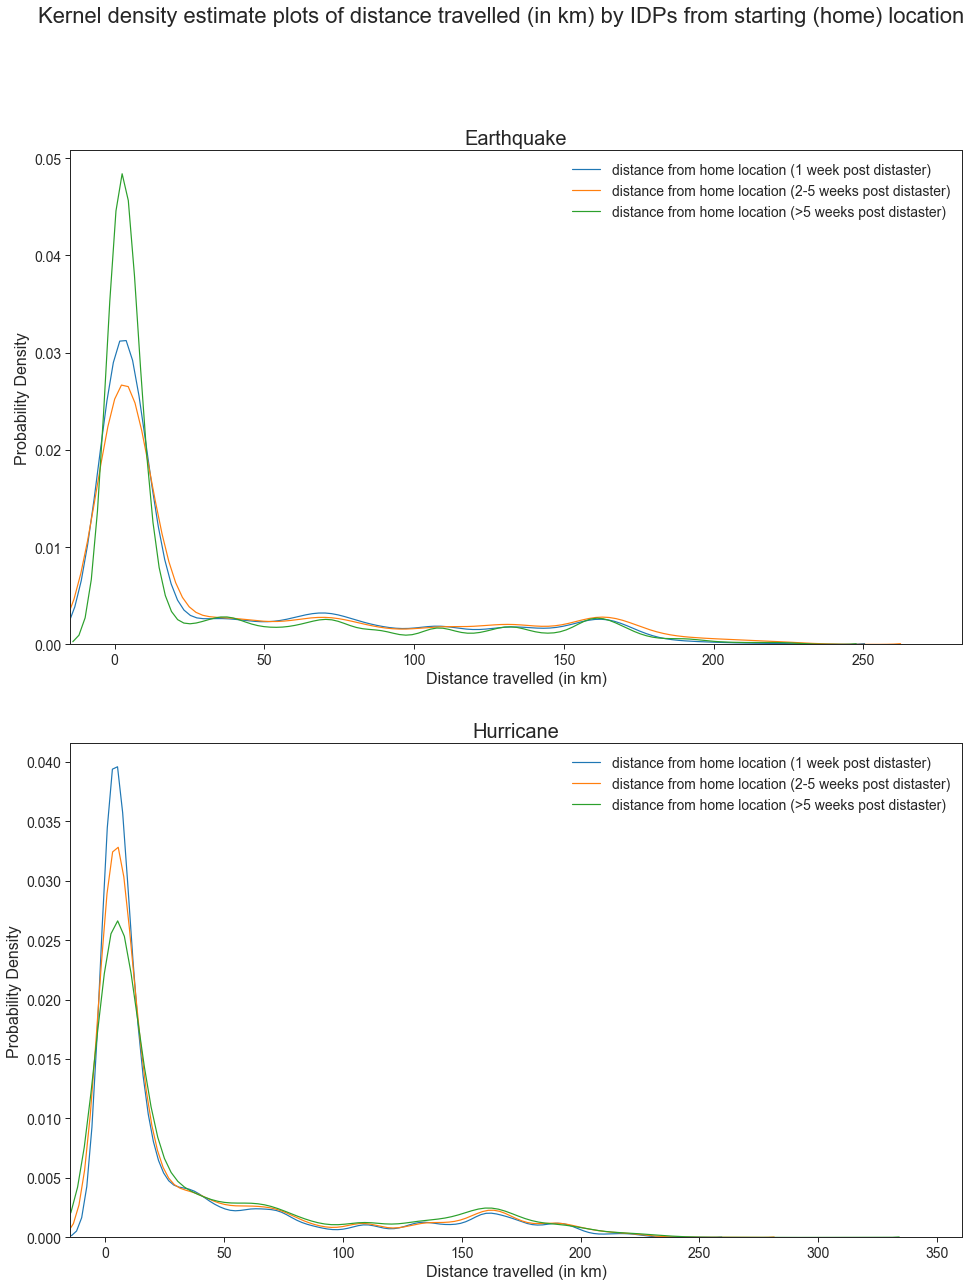

In [62]:
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":20,"axes.labelsize":16, "xtick.labelsize":14, "ytick.labelsize":14})  
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,20))
fig.suptitle('Kernel density estimate plots of distance travelled (in km) by IDPs from starting (home) location', fontsize=22)
ax1.set_title("Earthquake")
ax1.set(xlabel='Distance travelled (in km)', ylabel='Probability Density')
sns.kdeplot(df_earthquake['t1_dist_to_hl'], ax=ax1, label='distance from home location (1 week post distaster)').set(xlim=(-15, max(df_earthquake['t1_dist_to_hl'])+50))
sns.kdeplot(df_earthquake['t2_dist_to_hl'], ax=ax1, label='distance from home location (2-5 weeks post distaster)').set(xlim=(-15, max(df_earthquake['t2_dist_to_hl'])+50))
sns.kdeplot(df_earthquake['t3_dist_to_hl'], ax=ax1, label='distance from home location (>5 weeks post distaster)').set(xlim=(-15, max(df_earthquake['t3_dist_to_hl'])+50))
ax1.legend(loc='upper right', frameon=False, fontsize=14)

ax2.set_title("Hurricane")
ax2.set(xlabel='Distance travelled (in km)', ylabel='Probability Density')
sns.kdeplot(df_hurricane['t1_dist_to_hl'], ax=ax2, label='distance from home location (1 week post distaster)').set(xlim=(-15, max(df_hurricane['t1_dist_to_hl'])+50))
sns.kdeplot(df_hurricane['t2_dist_to_hl'], ax=ax2, label='distance from home location (2-5 weeks post distaster)').set(xlim=(-15, max(df_hurricane['t2_dist_to_hl'])+50))
sns.kdeplot(df_hurricane['t3_dist_to_hl'], ax=ax2, label='distance from home location (>5 weeks post distaster)').set(xlim=(-15, max(df_hurricane['t3_dist_to_hl'])+50))
ax2.legend(loc='upper right', frameon=False, fontsize=14)

In [44]:
fig.savefig(fname='disp_plot_combined.png', dpi=1000)